In [1]:
%load_ext autoreload
%autoreload 2

In [40]:
import torch

from pathlib import Path

from hubmap.visualization import visualize_checkpoint
from hubmap.visualization import visualize_image

from hubmap.dataset import TrainDataset, ValDataset
from hubmap.data import DATA_DIR
from checkpoints import CHECKPOINT_DIR
import hubmap.dataset.transforms as T

In [41]:
ckpt = "fct_with_normalization"

(<Figure size 400x400 with 1 Axes>, <Figure size 400x400 with 1 Axes>)

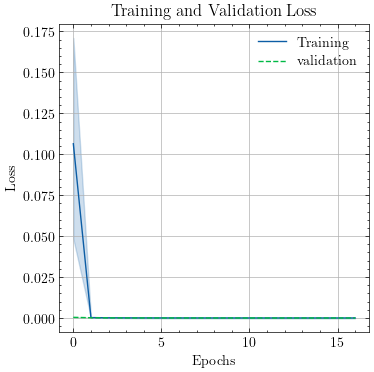

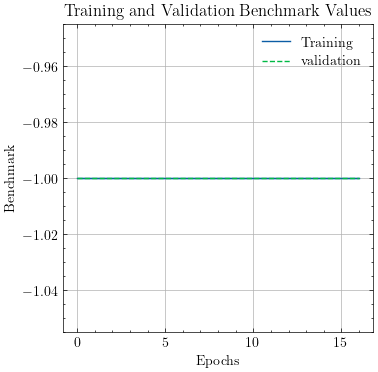

In [42]:
visualize_checkpoint(ckpt)

In [43]:
import torch

train_dataset_mean = torch.load(DATA_DIR / "train_dataset_mean.pt")
train_dataset_std = torch.load(DATA_DIR / "train_dataset_std.pt")

In [53]:
transforms = T.Compose(
    [
        T.ToTensor(mask_as_integer=True),
        T.Resize((64, 64)),
        T.Normalize(train_dataset_mean, train_dataset_std),
    ]
)
model_transforms = T.Compose(
    [
        T.ToTensor(mask_as_integer=True),
        T.Resize((64, 64)),
        T.Normalize(train_dataset_mean, train_dataset_std),
    ]
)

dataset = TrainDataset(DATA_DIR, transform=transforms, with_background=True, as_id_mask=True)
image, target = dataset.get(2, transform=transforms)
# target = target[:1, :, :]

In [45]:
from hubmap.models import FCT
from hubmap.models import init_weights

model = FCT(in_channels=3, num_classes=4)
model.apply(init_weights)

FCT(
  (scale_img): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (block_1): Block_encoder_bottleneck(
    (layernorm): LayerNorm((3,), eps=1e-05, elementwise_affine=True)
    (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (trans): Transformer(
      (attention_output): Attention(
        (conv_q): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=same, groups=8)
        (layernorm_q): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
        (conv_k): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=8)
        (layernorm_k): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
        (conv_v): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=8)
        (layernorm_v): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
        (attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=8, out_

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


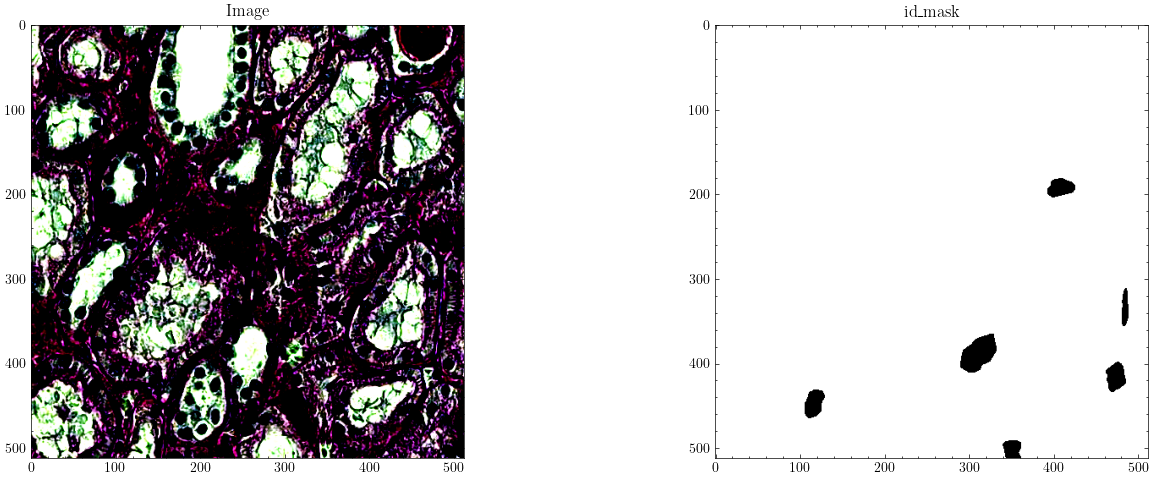

In [46]:
dataset.plot_example(4)

In [47]:
checkpoint = torch.load(Path(CHECKPOINT_DIR, ckpt))

In [48]:
model.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

In [75]:

transforms = T.Compose(
    [
        T.ToTensor(),
        T.Resize((64, 64)),
        # T.Normalize(train_dataset_mean, train_dataset_std),
    ]
)
model_transforms = T.Compose(
    [
        T.ToTensor(mask_as_integer=True),
        T.Resize((64, 64)),
        T.Normalize(train_dataset_mean, train_dataset_std),
    ]
)

dataset = TrainDataset(DATA_DIR, transform=transforms, with_background=True, as_id_mask=True)
image_plt, _ = dataset.get(5, transform=transforms)
image_pred, target = dataset.get(5, transform=model_transforms)

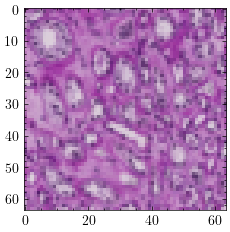

In [78]:
import matplotlib.pyplot as plt

plt.imshow(image.squeeze(0).permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


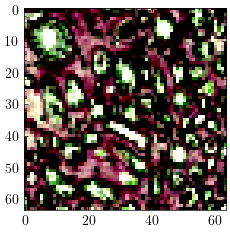

In [80]:
plt.imshow(image_pred.squeeze(0).permute(1, 2, 0))

In [81]:
model = model.to("cuda")
image_pred = image_pred.to("cuda")

In [83]:
image_pred.size()

torch.Size([3, 64, 64])

In [84]:
prediction = model(image_pred.unsqueeze(0))

In [100]:
prediction[2].size()

torch.Size([1, 4, 64, 64])

In [106]:
a = F.softmax(prediction[2], dim=1)
a.size()

torch.Size([1, 4, 64, 64])

In [107]:
a = torch.argmax(pred, dim=1)
a.size()

torch.Size([1, 64, 64])

In [109]:
a.min(), a.max()

(tensor(0, device='cuda:0'), tensor(0, device='cuda:0'))

In [96]:
import torch.nn.functional as F

In [97]:
probs = F.softmax(prediction[2], dim=1)
pred = torch.argmax(probs, dim=1, keepdims=True)
pred.size()

torch.Size([1, 1, 64, 64])

In [98]:
pred.min(), pred.max()

(tensor(0, device='cuda:0'), tensor(0, device='cuda:0'))

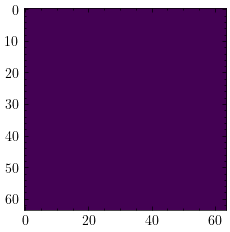

In [99]:
plt.imshow(pred.squeeze().detach().cpu())

In [74]:
from skimage.color import label2rgb

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


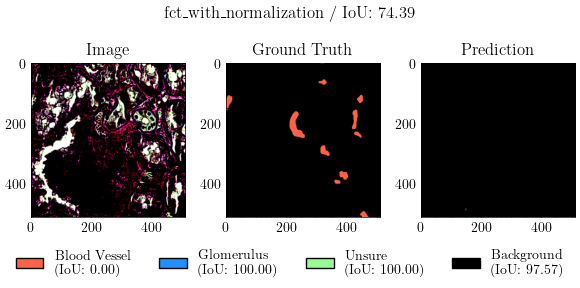

In [23]:
_ = visualize_image(model, ckpt, image, target, transforms=model_transforms, pred_idx=2)

In [26]:
transforms = T.Compose(
    [
        T.ToTensor(),
        T.Resize((64, 64)),
        T.Normalize(train_dataset_mean, train_dataset_std),
    ]
)
model_transforms = T.Compose([])
    # [
        # T.Normalize(train_dataset_mean, train_dataset_std),
    # ]
# )

dataset = ValDataset(DATA_DIR, transform=transforms, with_background=True)
image, target = dataset.get(2, transform=transforms)
# target = target[:1, :, :]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


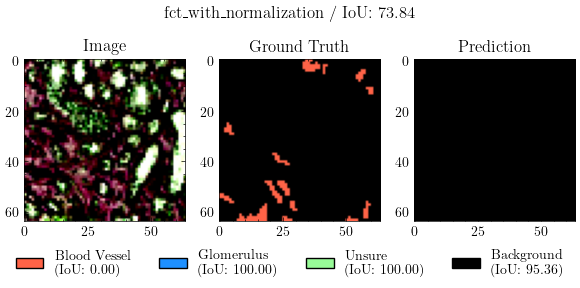

In [27]:
_ = visualize_image(model, ckpt, image, target, transforms=model_transforms, pred_idx=2)

_